## Abstract

Investigating how the world record for Rainbow Road on Mario Kart 64 developed over time.

## Introduction

Mario Kart 64 is a racing video game developed and published by [Nintendo](https://en.wikipedia.org/wiki/Nintendo) for the [Nintendo 64](https://en.wikipedia.org/wiki/Nintendo_64).

Players can choose from eight characters to race as, including:

- Mario
- Toad
- Princess Peach

The game consists of 16 tracks to race around. World records can be set for either 1 lap or a full race (3 laps) of the course. As players competed for faster times, several track shortcuts have been discovered. There are separate world records for with and without the use of a shortcut. 

## Methods

We loaded a dataset of [Mario Kart 64](https://mkwrs.com/) world records. This data is from [tidytuesday](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-05-25/readme.md) with credit to [Benedikt Claus](https://github.com/benediktclaus).

In [92]:
import pandas as pd

records = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
)
records.head()

,track,type,shortcut,player,system_played,date,time_period,time,record_duration
0,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S,132.99,1
1,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S,129.99,0
2,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S,128.99,12
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S,126.99,7
4,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S,124.51,54


For this investigation we are interested in the world records for rainbow road, over a 3 lap course.

In [93]:
rainbow_road = records[
    (records["track"] == "Rainbow Road") & 
    (records["type"] == "Three Lap")
].reset_index()

## Results

The figure below shows the development of world records for the Rainbow Road track on Mario Kart N64 from 1917 to 2021. 

In [94]:
#| echo: false
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

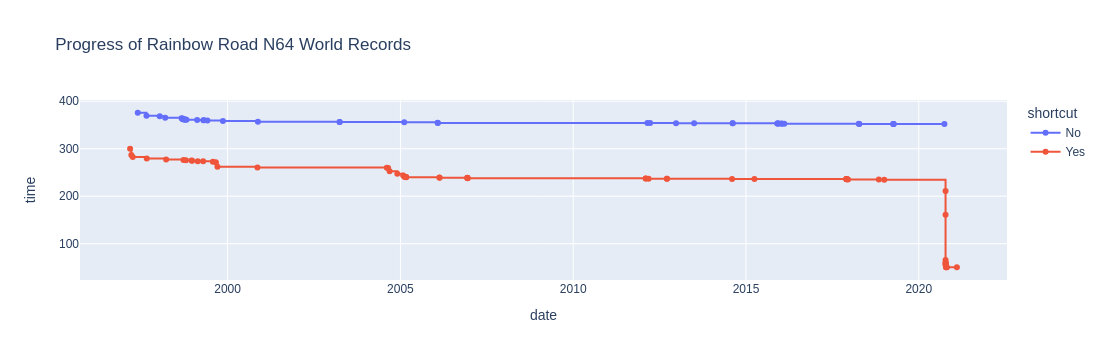

In [98]:
#| echo: false
#| fig-cap: "Progress of Rainbow Road world records, with and without allowing shortcuts."
#| fig-width: 8
#| label: wr-plot
import plotly.express as px

px.line(
    rainbow_road,
    x="date",
    y="time",
    color="shortcut",
    title="Progress of Rainbow Road N64 World Records",
    line_shape="hv",
    markers="."
)

In [96]:
#| echo: false
from IPython.display import display, Markdown

max_duration = rainbow_road.record_duration.max()
display(Markdown(
f"""
The longest a 3 lap world record was held 
for on Rainbow Road is {max_duration} days
({round(max_duration/365,1)} years).
"""
))


The longest a 3 lap world record was held 
for on Rainbow Road is 2214 days
(6.1 years).
